In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import logging
import sys


In [27]:
spotify_df = pd.read_csv("../data/spotify_dataset.csv")
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [28]:
track_id_count = spotify_df['track_id'].value_counts()

specific_track_id = '5SuOikwiRyPMVoIQDJUgSV'
if specific_track_id in track_id_count.index:
    print(f"The track_id '{specific_track_id}' repeats {track_id_count[specific_track_id]} times.")
else:
    print(f"The track_id '{specific_track_id}' does not exist in the dataset.")


The track_id '5SuOikwiRyPMVoIQDJUgSV' repeats 4 times.


In [29]:
specific_track_id = '5SuOikwiRyPMVoIQDJUgSV'

specific_track_rows = spotify_df.loc[spotify_df['track_id'] == specific_track_id]

print("All Rows with Track ID:", specific_track_id)
print(specific_track_rows)


All Rows with Track ID: 5SuOikwiRyPMVoIQDJUgSV
        Unnamed: 0                track_id      artists album_name track_name  \
0                0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
62102        62102  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
99152        99152  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
102151      102151  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   

        popularity  duration_ms  explicit  danceability  energy  ...  \
0               73       230666     False         0.676   0.461  ...   
62102           73       230666     False         0.676   0.461  ...   
99152           73       230666     False         0.676   0.461  ...   
102151          73       230666     False         0.676   0.461  ...   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0        0.143        0.0322          0.000001     0.358   
62102     -6.746     0  

In [30]:
spotify_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [31]:
spotify_df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [32]:
spotify_df.info()
total_null_values = spotify_df.isna().sum()
total_null_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [33]:
rows, columns = spotify_df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 114000
Number of columns: 21


In [34]:
total_duplicates = spotify_df.duplicated().sum()
total_duplicates

0

In [35]:
unique_genres = spotify_df['track_genre'].unique()
number_of_unique_genres = spotify_df['track_genre'].nunique()

print("Unique genres in 'track_genre':")
print(unique_genres)

Unique genres in 'track_genre':
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 's

With this we know that there are a lot of genres, so we can categorize it for a better visualization.

In [39]:
def transform_spotify(spotify_df):
    genre_categories = {
        'Rock': ['alt-rock', 'grunge', 'hard-rock', 'punk-rock', 'rock', 'rock-n-roll', 'goth', 'punk', 'psych-rock', 'j-rock', 'acoustic', 'brittish', 'rockabilly'],
        'Pop': ['pop', 'power-pop', 'pop-film', 'k-pop', 'j-pop', 'cantopop', 'children', 'disney', 'happy', 'kids', 'mandopop', 'mpb', 'power-pop', 'romance', 'sad', 'singer-songwriter', 'spanish'],
        'Electronic/Dance': ['electronic', 'dubstep', 'edm', 'electro', 'techno', 'trance', 'house', 'deep-house', 'disco', 'dancehall', 'chicago-house', 'detroit-techno', 'hardstyle', 'minimal-techno', 'j-dance', 'party', 'breakbeat', 'drum-and-bass', 'dub', 'progressive-house', 'trip-hop'],
        'Hip-Hop/R&B': ['hip-hop', 'r-n-b', 'j-idol', 'afrobeat'],
        'Metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore', 'industrial', 'hardcore'],
        'Jazz/Blues': ['jazz', 'blues'],
        'Folk/Country': ['folk', 'country', 'bluegrass', 'forro', 'honky-tonk'],
        'Latin': ['latin', 'salsa', 'samba', 'reggaeton', 'latino'],
        'Classical/Opera': ['classical', 'opera', 'piano'],
        'Indie/Alternative': ['alternative', 'indie', 'indie-pop', 'singer-songwriter', 'emo', 'ska'],
        'World Music': ['world-music', 'brazil', 'indian', 'iranian', 'malay', 'mandopop', 'swedish', 'turkish', 'french', 'german', 'reggae', 'synth-pop'],
        'Ambient/Chill/Downtempo': ['ambient', 'chill', 'new-age', 'sleep', 'tango', 'study'],
        'Funk/Soul': ['funk', 'soul', 'gospel', 'groove']
    }
    
    spotify_df['genre_category'] = 'Other'  
    
    for category, genres in genre_categories.items():
        spotify_df.loc[spotify_df['track_genre'].isin(genres), 'genre_category'] = category
    spotify_df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)
    spotify_df = spotify_df.dropna(subset=['artists'])
    spotify_df['num_artists'] = spotify_df['artists'].str.split(';').apply(len)
    spotify_df['second_artist'] = spotify_df['artists'].apply(lambda x: x.split(';')[1] if len(x.split(';')) > 1 else "No second artist")
    spotify_df['popularity_category'] = pd.cut(spotify_df['popularity'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

    
    columns_to_drop = [
        'Unnamed: 0',
        'track_id',
        'key',
        'mode',
        'instrumentalness',
        'time_signature',
        'liveness',
        'valence',
    
    ]
    spotify_df.drop(columns=columns_to_drop, axis=1, inplace=True)
    spotify_df.drop_duplicates(inplace=True)

    

    logging.info("Transformations applied to Spotify data")
    return spotify_df


In [40]:
spotify_df = transform_spotify(spotify_df)

C:\Users\J_Cam\AppData\Local\Temp\ipykernel_17708\343858040.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['num_artists'] = spotify_df['artists'].str.split(';').apply(len)
C:\Users\J_Cam\AppData\Local\Temp\ipykernel_17708\343858040.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df['second_artist'] = spotify_df['artists'].apply(lambda x: x.split(';')[1] if len(x.split(';')) > 1 else "No second artist")
C:\Users\J_Cam\AppData\Local\Temp\ipykernel_17708\343858040.py:26: SettingWi

In [41]:
spotify_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,tempo,track_genre,genre_category,num_artists,second_artist,popularity_category
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,87.917,acoustic,Rock,1,No second artist,High
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,77.489,acoustic,Rock,1,No second artist,Medium
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,76.332,acoustic,Rock,2,ZAYN,Medium
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,181.740,acoustic,Rock,1,No second artist,High
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,119.949,acoustic,Rock,1,No second artist,High


In [42]:
category_counts = spotify_df['genre_category'].value_counts()

most_common_category = category_counts.idxmax()
max_category_count = category_counts.max()

print("Category with the most records:", most_common_category)
print("Number of records in this category:", max_category_count)


Category with the most records: Electronic/Dance
Number of records in this category: 16418


The category with most records is Electronic/Dance, but we can observe it better in the dashboard

In [43]:
other_genres = spotify_df.loc[spotify_df['genre_category'] == 'Other', 'track_genre'].unique()

print("Genres categorized as 'Other':")
for genre in other_genres:
    print(genre)


Genres categorized as 'Other':
anime
british
club
comedy
dance
garage
guitar
idm
pagode
sertanejo
show-tunes


These are the genres in the category 'Other'

In [201]:
category_counts = spotify_df['genre_category'].value_counts()

other_category_count = category_counts.get('Other', 0)

print("Quantity of 'Other' category:", other_category_count)


Quantity of 'Other' category: 10169


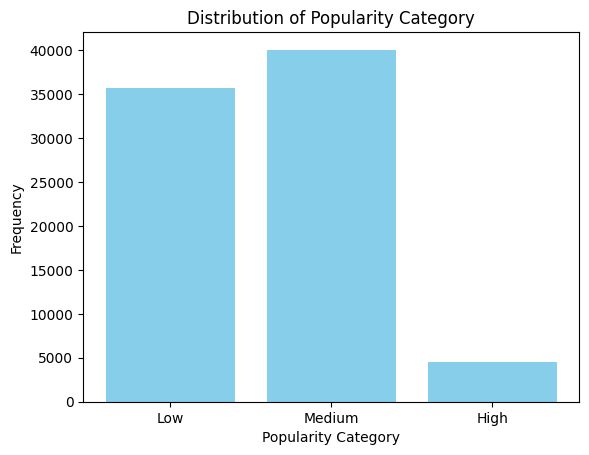

In [45]:
popularity_counts = spotify_df['popularity_category'].value_counts().sort_index()
    
plt.bar(popularity_counts.index, popularity_counts.values, color='skyblue')
    
plt.xlabel('Popularity Category')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Category')
    
plt.show()



In [206]:
spotify_df.dtypes

artists                  object
album_name               object
track_name               object
popularity                int64
duration_ms               int64
explicit                   bool
danceability            float64
energy                  float64
loudness                float64
speechiness             float64
acousticness            float64
tempo                   float64
track_genre              object
genre_category           object
num_artists               int64
second_artist            object
popularity_category    category
dtype: object

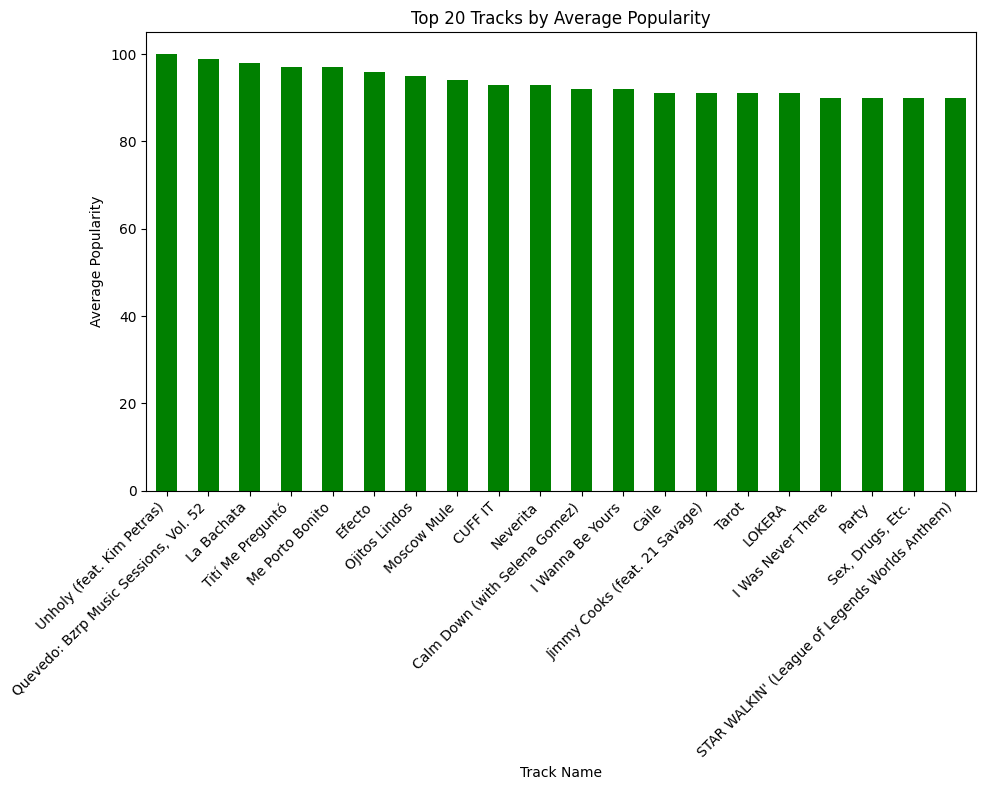

In [47]:
track_popularity = spotify_df.groupby('track_name')['popularity'].mean()
sorted_track = track_popularity.sort_values(ascending=False)
top_albums = sorted_track.head(20)

plt.figure(figsize=(10, 8))
top_albums.plot(kind='bar', color='green')
plt.title('Top 20 Tracks by Average Popularity')
plt.xlabel('Track Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding

# Show the plot
plt.show()

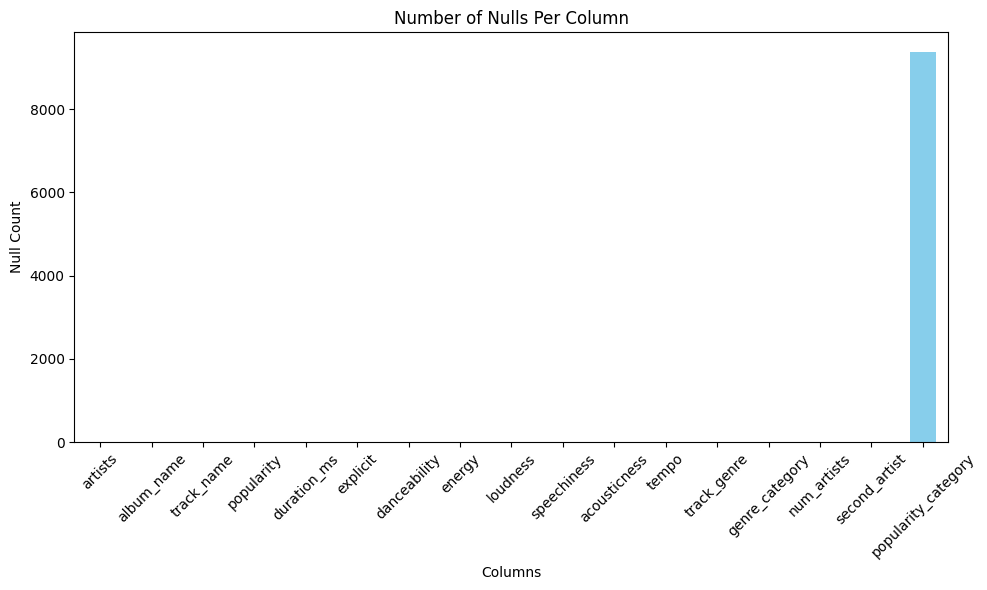

In [204]:
null_counts = spotify_df.isnull().sum()

plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Nulls Per Column')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation=45)
plt.tight_layout()  

plt.show()

In [48]:
num_rows, num_columns = spotify_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 89665
Number of columns: 17


In [210]:
total_duplicates = spotify_df.duplicated().sum()
total_duplicates

0